In [107]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',1000)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
airline_data = pd.read_csv('airlines.csv')
airport_data = pd.read_csv('airports.csv')
flight_clean = pd.read_csv('Clean-Data.csv',dtype=str)

In [3]:
flight_clean.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEP_HOUR,SCHEDULED_DEP_MIN,DEP_HOUR,DEP_MIN,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF_HOUR,WHEELS_OFF_MIN,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON_HOUR,WHEELS_ON_MIN,TAXI_IN,SCHEDULED_ARRIVAL_HOUR,SCHEDULED_ARRIVAL_MIN,ARRIVAL_TIME_HOUR,ARRIVAL_TIME_MIN,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,FLIGHT_STATUS
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,00,05,23,54,-11,21,00,15,205,194,169,1448,04,04,4,04,30,04,08,-22,0,0,N/A - Flight Not Cancelled,0,0,0,0,0,Early Arrival
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,00,10,00,02,-8,12,00,14,280,279,263,2330,07,37,4,07,50,07,41,-9,0,0,N/A - Flight Not Cancelled,0,0,0,0,0,Early Arrival
2,2015,1,1,4,US,840,N171US,SFO,CLT,00,20,00,18,-2,16,00,34,286,293,266,2296,08,00,11,08,06,08,11,5,0,0,N/A - Flight Not Cancelled,0,0,0,0,0,On Time
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,00,20,00,15,-5,15,00,30,285,281,258,2342,07,48,8,08,05,07,56,-9,0,0,N/A - Flight Not Cancelled,0,0,0,0,0,Early Arrival
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,00,25,00,24,-1,11,00,35,235,215,199,1448,02,54,5,03,20,02,59,-21,0,0,N/A - Flight Not Cancelled,0,0,0,0,0,Early Arrival


### Data Preprocessing

In [4]:
df = flight_clean.copy()

In [5]:
int_cols = [
    'YEAR','MONTH','DAY','DAY_OF_WEEK','FLIGHT_NUMBER',
    'DEPARTURE_DELAY','TAXI_OUT','SCHEDULED_TIME',
    'ELAPSED_TIME','AIR_TIME','DISTANCE','TAXI_IN',
    'ARRIVAL_DELAY','DIVERTED','CANCELLED',
    'AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY',
    'LATE_AIRCRAFT_DELAY','WEATHER_DELAY'
]

df[int_cols] = df[int_cols].astype('int64')


In [29]:
airline_data

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [30]:
df = pd.merge(df,airline_data,left_on='AIRLINE',right_on='IATA_CODE',how='left')

In [33]:
df.rename(columns={'AIRLINE_x':'AIRLINE_IATA','AIRLINE_y':'AIRLINE'},inplace=True)

In [35]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_IATA,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEP_HOUR,SCHEDULED_DEP_MIN,DEP_HOUR,DEP_MIN,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF_HOUR,WHEELS_OFF_MIN,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON_HOUR,WHEELS_ON_MIN,TAXI_IN,SCHEDULED_ARRIVAL_HOUR,SCHEDULED_ARRIVAL_MIN,ARRIVAL_TIME_HOUR,ARRIVAL_TIME_MIN,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,FLIGHT_STATUS,IATA_CODE,AIRLINE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,00,05,23,54,-11,21,00,15,205,194,169,1448,04,04,4,04,30,04,08,-22,0,0,N/A - Flight Not Cancelled,0,0,0,0,0,Early Arrival,AS,Alaska Airlines Inc.
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,00,10,00,02,-8,12,00,14,280,279,263,2330,07,37,4,07,50,07,41,-9,0,0,N/A - Flight Not Cancelled,0,0,0,0,0,Early Arrival,AA,American Airlines Inc.
2,2015,1,1,4,US,840,N171US,SFO,CLT,00,20,00,18,-2,16,00,34,286,293,266,2296,08,00,11,08,06,08,11,5,0,0,N/A - Flight Not Cancelled,0,0,0,0,0,On Time,US,US Airways Inc.
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,00,20,00,15,-5,15,00,30,285,281,258,2342,07,48,8,08,05,07,56,-9,0,0,N/A - Flight Not Cancelled,0,0,0,0,0,Early Arrival,AA,American Airlines Inc.
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,00,25,00,24,-1,11,00,35,235,215,199,1448,02,54,5,03,20,02,59,-21,0,0,N/A - Flight Not Cancelled,0,0,0,0,0,Early Arrival,AS,Alaska Airlines Inc.


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499999 entries, 0 to 499998
Data columns (total 40 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   YEAR                    499999 non-null  int64 
 1   MONTH                   499999 non-null  int64 
 2   DAY                     499999 non-null  int64 
 3   DAY_OF_WEEK             499999 non-null  int64 
 4   AIRLINE_IATA            499999 non-null  object
 5   FLIGHT_NUMBER           499999 non-null  int64 
 6   TAIL_NUMBER             499999 non-null  object
 7   ORIGIN_AIRPORT          499999 non-null  object
 8   DESTINATION_AIRPORT     499999 non-null  object
 9   SCHEDULED_DEP_HOUR      499999 non-null  object
 10  SCHEDULED_DEP_MIN       499999 non-null  object
 11  DEP_HOUR                499999 non-null  object
 12  DEP_MIN                 499999 non-null  object
 13  DEPARTURE_DELAY         499999 non-null  int64 
 14  TAXI_OUT                499999 non-n

In [37]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
YEAR,499999.0,2015.000000,0.000000,2015.0,2015.0,2015.0,2015.0,2015.0
MONTH,499999.0,1.060062,0.237602,1.0,1.0,1.0,1.0,2.0
DAY,499999.0,14.995452,9.320100,1.0,7.0,15.0,23.0,31.0
DAY_OF_WEEK,499999.0,4.006000,2.012337,1.0,2.0,4.0,6.0,7.0
FLIGHT_NUMBER,499999.0,2263.470967,1803.531680,1.0,759.0,1732.0,3484.0,9793.0
DEPARTURE_DELAY,499999.0,9.790344,37.139699,-48.0,-5.0,-1.0,8.0,1988.0
TAXI_OUT,499999.0,15.937028,9.959970,0.0,10.0,14.0,19.0,177.0
SCHEDULED_TIME,499999.0,140.254691,74.854035,23.0,85.0,122.0,173.0,718.0
ELAPSED_TIME,499999.0,131.676237,76.752729,0.0,79.0,116.0,167.0,724.0
AIR_TIME,499999.0,108.540245,73.491398,0.0,56.0,91.0,142.0,676.0


### Null Value Check

In [39]:
# df.isnull().sum()

### Data Analysis

### what's the distribution of flight status? 

Early Arrival      215719
Delayed Arrival    150954
On Time            133326
Name: FLIGHT_STATUS, dtype: int64
Early Arrival      0.431439
Delayed Arrival    0.301909
On Time            0.266653
Name: FLIGHT_STATUS, dtype: float64


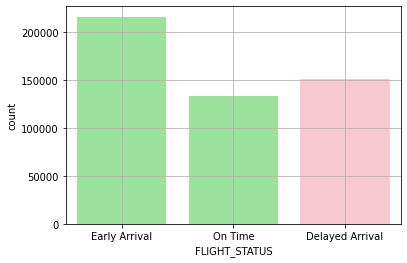

In [40]:

# palette = {'Early Arrival':'lightgreen','On Time':'lime','Delayed Arrival':'lightgreen'}
# sns.countplot(df['FLIGHT_STATUS'],palette=palette.items())
# plt.grid()
# print(df['FLIGHT_STATUS'].value_counts())
# plt.show()

palette = {'Early Arrival': 'lightgreen',
    'On Time': 'lightgreen',
    'Delayed Arrival': 'pink'}

sns.countplot(x=df['FLIGHT_STATUS'],palette=palette)
plt.grid()
print(df['FLIGHT_STATUS'].value_counts())
print(df['FLIGHT_STATUS'].value_counts(normalize=True))

plt.show()

### Let's understand which airlines have the highest delays and their average delays

                         AIRLINE    FLIGHT_STATUS      %
15        Frontier Airlines Inc.  Delayed Arrival  43.75
6   American Eagle Airlines Inc.  Delayed Arrival  40.69
30              Spirit Air Lines  Delayed Arrival  38.74
25         Skywest Airlines Inc.  Delayed Arrival  33.97
22               JetBlue Airways  Delayed Arrival  32.11
10   Atlantic Southeast Airlines  Delayed Arrival  31.97
37         United Air Lines Inc.  Delayed Arrival  31.76
4         American Airlines Inc.  Delayed Arrival  31.71
34               US Airways Inc.  Delayed Arrival  28.96
28        Southwest Airlines Co.  Delayed Arrival  28.71
19        Hawaiian Airlines Inc.  Delayed Arrival  27.52
41                Virgin America  Delayed Arrival  25.77
2           Alaska Airlines Inc.  Delayed Arrival  24.48
14          Delta Air Lines Inc.  Delayed Arrival  20.58


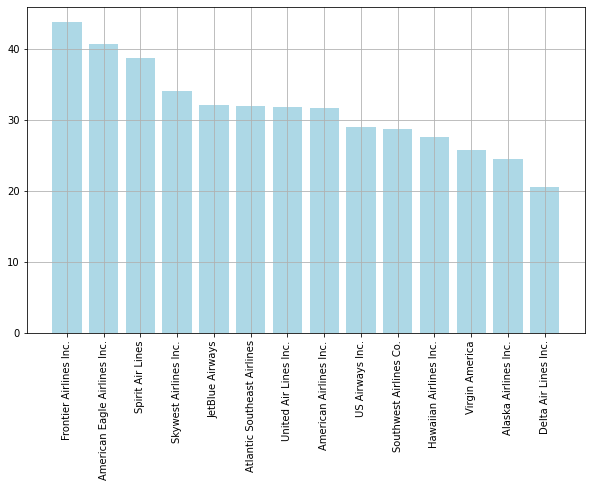

In [93]:
al = (df.groupby('AIRLINE')['FLIGHT_STATUS'].value_counts(normalize=True).mul(100).round(2).rename('%').reset_index())
# al
al_delayed = al[al['FLIGHT_STATUS']=='Delayed Arrival'].sort_values(by = '%',ascending=False)
plt.figure(figsize=(10,6))
plt.bar(al_delayed['AIRLINE'] , al_delayed['%'],color='lightblue')
plt.grid()
print(al_delayed)
plt.xticks(rotation=90)
plt.show()


In [94]:
# # For Gradient colors

# import matplotlib.pyplot as plt
# import matplotlib.cm as cm
# import matplotlib.colors as mcolors

# al_delayed = al[al['FLIGHT_STATUS'] == 'Delayed Arrival'] \
#     .sort_values(by='%', ascending=False)

# plt.figure(figsize=(10, 6))

# # Normalize values to 0–1
# norm = mcolors.Normalize(
#     vmin=al_delayed['%'].min(),
#     vmax=al_delayed['%'].max()
# )

# # Choose a colormap
# colors = cm.Blues(norm(al_delayed['%']))

# plt.bar(
#     al_delayed['AIRLINE'],
#     al_delayed['%'],
#     color=colors
# )

# plt.grid(axis='y', alpha=0.3)
# plt.xticks(rotation=90)
# plt.ylabel('Delayed Arrival (%)')
# plt.title('Delayed Arrivals by Airline (Gradient)')
# plt.show()


### About 44% of Frontier Airline flights are delayed

In [95]:
df.groupby('AIRLINE')['ARRIVAL_DELAY'].mean().sort_values()

AIRLINE
Delta Air Lines Inc.            -0.992181
Alaska Airlines Inc.             0.043466
Virgin America                   1.283224
Hawaiian Airlines Inc.           3.332167
Southwest Airlines Co.           3.459319
US Airways Inc.                  3.885758
United Air Lines Inc.            6.371908
American Airlines Inc.           6.847306
JetBlue Airways                  7.615645
Atlantic Southeast Airlines      8.405230
Skywest Airlines Inc.           10.767291
Spirit Air Lines                12.353749
American Eagle Airlines Inc.    16.349009
Frontier Airlines Inc.          19.844329
Name: ARRIVAL_DELAY, dtype: float64

### Frontier Airlines has the highest flight arrival delay time on avg

### Let's now see what all origin airports have the most delays

In [104]:
# df.groupby('ORIGIN_AIRPORT')['FLIGHT_STATUS'].value_counts(normalize=False)

In [109]:
df.groupby('ORIGIN_AIRPORT')['ARRIVAL_DELAY'].mean().sort_values()

ORIGIN_AIRPORT
CNY   -24.793103
BTM   -13.984848
YAK   -12.125000
LWS   -11.155172
BJI    -7.940299
ADQ    -7.937500
CDV    -7.921875
HLN    -7.550847
TWF    -5.681818
EKO    -5.046154
ADK    -4.600000
DAB    -4.181102
ANC    -4.001582
MMH    -3.763158
CDC    -3.375000
MSO    -3.208333
HRL    -3.151316
MLB    -3.016000
BIL    -2.836910
HIB    -2.301205
GCC    -2.055118
PSC    -1.804124
ORH    -1.469697
RKS    -1.403226
EYW    -1.285714
HOB    -1.207547
CPR    -1.084270
PSE    -0.937500
BET    -0.862069
FNT    -0.850602
FAI    -0.766467
AVL    -0.713636
TRI    -0.619318
LIH    -0.547244
EWN    -0.409836
FCA    -0.205882
CHA    -0.167665
LRD    -0.076577
KOA    -0.006654
PVD     0.087882
ILM     0.132911
LGB     0.243605
GPT     0.337989
CAK     0.478921
MFE     0.526316
HNL     0.529185
BQK     0.600000
ACY     0.752747
RDD     0.757576
PDX     0.763430
SLC     0.836979
MSY     0.866742
SDF     0.957214
GTR     0.965909
OGG     1.093673
ATL     1.244319
MHT     1.266533
SIT     1.424242

In [99]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_IATA,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEP_HOUR,SCHEDULED_DEP_MIN,DEP_HOUR,DEP_MIN,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF_HOUR,WHEELS_OFF_MIN,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON_HOUR,WHEELS_ON_MIN,TAXI_IN,SCHEDULED_ARRIVAL_HOUR,SCHEDULED_ARRIVAL_MIN,ARRIVAL_TIME_HOUR,ARRIVAL_TIME_MIN,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,FLIGHT_STATUS,IATA_CODE,AIRLINE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,00,05,23,54,-11,21,00,15,205,194,169,1448,04,04,4,04,30,04,08,-22,0,0,N/A - Flight Not Cancelled,0,0,0,0,0,Early Arrival,AS,Alaska Airlines Inc.
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,00,10,00,02,-8,12,00,14,280,279,263,2330,07,37,4,07,50,07,41,-9,0,0,N/A - Flight Not Cancelled,0,0,0,0,0,Early Arrival,AA,American Airlines Inc.
2,2015,1,1,4,US,840,N171US,SFO,CLT,00,20,00,18,-2,16,00,34,286,293,266,2296,08,00,11,08,06,08,11,5,0,0,N/A - Flight Not Cancelled,0,0,0,0,0,On Time,US,US Airways Inc.
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,00,20,00,15,-5,15,00,30,285,281,258,2342,07,48,8,08,05,07,56,-9,0,0,N/A - Flight Not Cancelled,0,0,0,0,0,Early Arrival,AA,American Airlines Inc.
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,00,25,00,24,-1,11,00,35,235,215,199,1448,02,54,5,03,20,02,59,-21,0,0,N/A - Flight Not Cancelled,0,0,0,0,0,Early Arrival,AS,Alaska Airlines Inc.
